Coding Assignment 2


Callie Moody and Perry Zhang

Credit Statement: we worked with each other and did not attend office hours

In [ ]:
# a)
import math

#global counting variables
NaiveCount=0
KaratCount=0


def NaiveMultPoly(P,Q):
  n= len(P)-1
  r=[]
  global NaiveCount
  #iterates through all possible powers of x in the product
  for i in range(2*n+1):
    a=0
    if i<=n:
      #if i is small, powers higher than i that cannot be multiplied to reach the ith power
      for k in range(i+1):
        #every possible combo to reach power i
        a+= P[k]*Q[i-k]
        NaiveCount += 1
    else:
      #if i is large, a tiny power cannot multiply to equal i
      for k in range(i-n,n+1):
        #every possible combo to reach power i
        a+= P[k]*Q[i-k]
        NaiveCount += 1
    r.append(a)

  return r


#divide and counter naive functionality
#not necessary for this assignment- extra coding 
def DCMultPoly(P,Q):
  n= len(P)
  r=[]
  global NaiveCount 

  if n==1:
    r.append(P[0]*Q[0])
    NaiveCount += 1

  else:
    m= math.ceil((n)/2)
    
    p1=P[0:m]
    p2=P[m:]
    if len(p2)<len(p1):
      p2.append(0)
    q1=Q[0:m]
    q2=Q[m:]
    if len(q2)<len(q1):
      q2.append(0)
    r1=DCMultPoly(p1,q1)
    r2=DCMultPoly(p1,q2)
    r3=DCMultPoly(p2,q1)
    r4=DCMultPoly(p2,q2)
    
    for  i in range(0,m):
      r2.insert(0,0)
      r3.insert(0,0)
      r4.insert(0,0)
      r4.insert(0,0)

    for i in range(0,2*n-1):
      a=0
      if len(r1)>i:
        a+=r1[i]
        if r1[i]!=0:
          NaiveCount += 1
      if len(r2)>i:
        a+=r2[i]
        if r2[i]!=0:
          NaiveCount += 1
      if len(r3)>i:
        a+=r3[i]
        if r3[i]!=0:
          NaiveCount += 1
      if len(r4)>i:
        a+=r4[i]
        if r4[i]!=0:
          NaiveCount += 1

      r.append(a)

  return r




In [ ]:
# testing cell
NaiveMultPoly([7,2,6],[2,3,9]) 

[14, 25, 81, 36, 54]

In [ ]:
# b)
def KaratMultPoly(P,Q):
  global KaratCount
  n = len(P)-1  #if P[0...n] then we have (n+1) elements

  #These are the base cases where the length of the polynomial arrays were only 0 and 1
  if n == 0:
    return [P[0]*Q[0]]
    KaratCount +=1
  if n == 1:
    R = [0 for i in range(3)]
    R[0] = P[0]*Q[0]
    KaratCount +=1
    R[1] = P[0]*Q[1] + Q[0]*P[1]
    KaratCount +=1
    KaratCount +=1
    KaratCount +=1  #should addition here count?
    R[2] = P[1]*Q[1]
    KaratCount +=1
    return R

  #defining m and allocating for P' and Q' based on pseudocode
  m = int((n+1)/2)
  P_prime = [0 for i in range(m+1)]
  Q_prime = [0 for i in range(m+1)]

  for i in range(m):
    P_prime[i] = (P[i] + P[m+i])
    KaratCount +=1
    Q_prime[i] = (Q[i] + Q[m+i])
    KaratCount +=1

  #filling P' and Q'
  if n > (2*m-1):
    P_prime[m] = P[n]
    Q_prime[m] = Q[n]
  else:
    P_prime[m] = Q_prime[m] = 0 #padding the last data with 0

  
  #allocating space for all three of the R arrays to conduct further polynomial arithmetic
  R_1 = [0 for i in range(2*m+1)]
  R_2 = [0 for i in range(2*m+1)]
  R_3 = [0 for i in range(2*m+1)]

  #Using recursion, obtain each of the R arrays. Notice that we are only splicing into certain indices
  R_1[0:2*(m-1)+1] = KaratMultPoly(P[0:m],Q[0:m]) 
  R_2[0:2*(n-m)+1] = KaratMultPoly(P[m:n+1],Q[m:n+1]) 
  R_3[0:2*m+1] = KaratMultPoly(P_prime[0:m+1],Q_prime[0:m+1])

  #allocating space for R_4 and finally the R array that we want
  R_4 = [0 for i in range(2*m+1)]
  R = [0 for i in range(2*n+1)]

  #Fill R_4's indices
  for i in range(0,2*m+1):
    R_4[i] = (R_3[i] - R_1[i] - R_2[i])
    KaratCount +=1
    KaratCount +=1

  for i in range(0,2*n+1):  #We include if else statements to check on the indices so we don't exceed some of the lists
    first_term = 0
    second_term = 0
    third_term = 0

    #first term
    if i > len(R_1)-1:  #if we exceed the last index of R[]
      first_term = 0
    else:
      first_term = R_1[i]

    #second term
    if i-m < 0 or (i-m) > len(R_4)-1:  #if we go below 0 or over index len-1 for R_4
      second_term = 0
    else:
      second_term = R_4[i-m]
    
    #third term
    if i-2*m < 0 or (i-2*m) > len(R_2)-1:  #if we go below 0 or over index len-1 for R_2
      third_term = 0
    else:
      third_term = R_2[i-2*m]

    R[i] = (first_term + second_term + third_term)
    KaratCount +=1
    KaratCount +=1

  return R[0:2*n+1]

In [ ]:
# testing cell
KaratMultPoly([1,2,0],[2,3,9])

[2, 7, 15, 18, 0]

In [ ]:
# testing cell
KaratMultPoly([7,2,6],[2,3,9])

[14, 25, 81, 36, 54]

In [ ]:
#  c)
# pi function
def read_pi(n):
    #opens the file name "pi" and reads the first n digits
    #puts it in the list pi, and returns that list
    pi = list()
    f = open('pi','r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi



In [ ]:
#testing cell
#step 1: read pi 
digits_of_pi = read_pi(2)

print(digits_of_pi)

#step 2: get r_20000_pi(x)
r_2_pi = KaratMultPoly(digits_of_pi,digits_of_pi)

print(r_2_pi)

#step 3: square each digit in the array
r_2_pi_squared = [KaratMultPoly([i],[i])[0] for i in r_2_pi]

#step 3: sum
S_2 = sum(r_2_pi_squared)

print('S_2 is ' + str(S_2))

[3, 1]
[9, 6, 1]
S_2 is 118


In [ ]:
# c)
#step 1: read pi 
digits_of_pi = read_pi(20001)

#step 2: get r_20000_pi(x)
r_20000_pi = KaratMultPoly(digits_of_pi,digits_of_pi)

#step 3: square each digit in the array
r_20000_pi_squared = [KaratMultPoly([i],[i])[0] for i in r_20000_pi]

#step 3: sum
S_20000 = sum(r_20000_pi_squared)

print('S_20000 is ' + str(S_20000))

S_20000 is 2193109171093891


In [ ]:
#di
# Importing libraries
import time
from matplotlib import pyplot as plt
import numpy as np
import pprint

In [ ]:
time_naive = []
time_karat = []

for i in range(1, 2001, 50):
    #step 1: read pi 
    digits_of_pi = read_pi(i)


    #timing naive algorithm
    time_naive_start = time.time()
    rnaive = NaiveMultPoly(digits_of_pi,digits_of_pi)
    time_naive_end = time.time()
    time_naive.append(time_naive_end-time_naive_start)
    
    #timing smart algorithm
    time_karat_start = time.time()
    rkarat = KaratMultPoly(digits_of_pi,digits_of_pi)
    time_karat_end = time.time()
    time_karat.append(time_karat_end-time_karat_start)

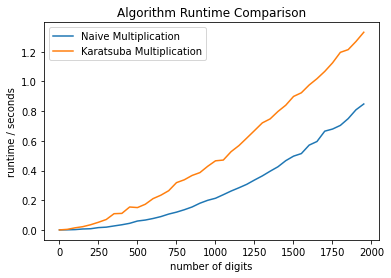

In [ ]:
x = np.arange(1, 2001, 50)

plt.plot(x, time_naive, x, time_karat)
plt.title("Algorithm Runtime Comparison")
plt.xlabel("number of digits")
plt.ylabel("runtime / seconds")
plt.legend(['Naive Multiplication', 'Karatsuba Multiplication'])
plt.show()

In [ ]:
#dii
count_naive=[]
count_karat=[]

for i in range(1, 201):
    #step 1: read pi 
    digits_of_pi = read_pi(i)
    #timing naive algorithm
    rnaive = NaiveMultPoly(digits_of_pi,digits_of_pi)
    count_naive.append(NaiveCount)
    NaiveCount=0
    #timing smart algorithm
    rkarat = KaratMultPoly(digits_of_pi,digits_of_pi)
    count_karat.append(KaratCount)
    KaratCount=0



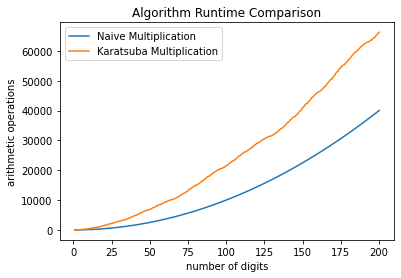

In [ ]:
x = np.arange(1, 201)

plt.plot(x, count_naive, x, count_karat)
plt.title("Algorithm Runtime Comparison")
plt.xlabel("number of digits")
plt.ylabel("arithmetic operations")
plt.legend(['Naive Multiplication', 'Karatsuba Multiplication'])
plt.show()

16


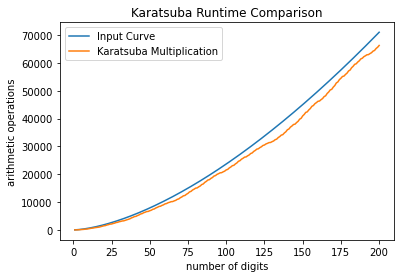

In [ ]:
#diii

x = np.arange(1, 201)

C=input()
C=float(C)
if C>0:
  plt.plot(x, C*x**(np.log2(3)), x, count_karat)
  plt.title("Karatsuba Runtime Comparison")
  plt.xlabel("number of digits")
  plt.ylabel("arithmetic operations")
  plt.legend(['Input Curve', 'Karatsuba Multiplication'])
  plt.show()


The value of C that most matches our runtime is 15


We iterated through many values of C and the two graphs converged at C=15